In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import g3py as g3


g3.style_big()
g3.style_widget()

# Data

In [2]:
x, y = g3.load_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.35)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 108 (34.95145631067961%)


In [3]:
gp = g3.GaussianProcess(x, g3.Zero(), g3.SE(x), hidden=y)
gp.describe('Sunspots','YEAR','SUNACTIVITY')
gp.observed(x_obs,y_obs)

Space Dimensions:  (309, 1)
Definition OK
Compilation OK


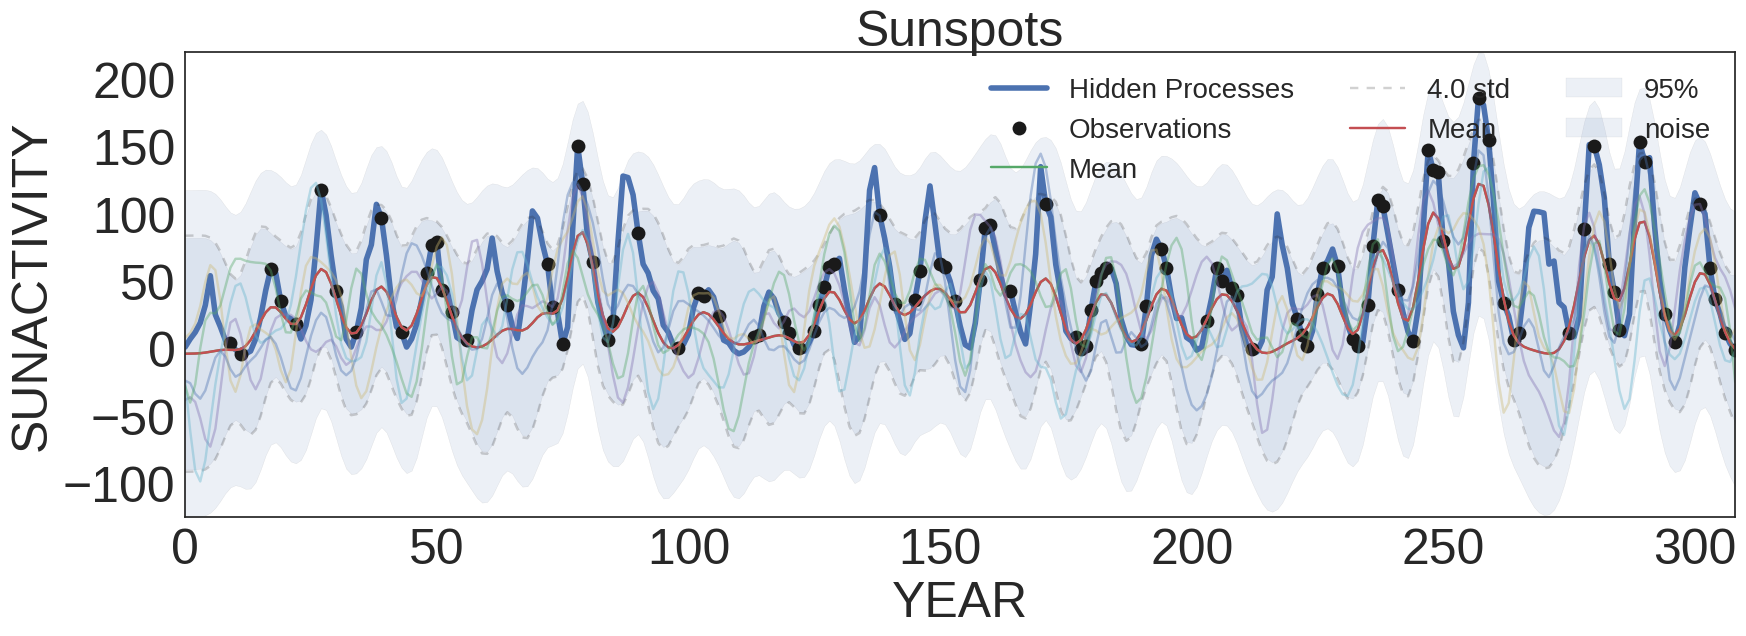

In [4]:
gp.plot(samples=5)

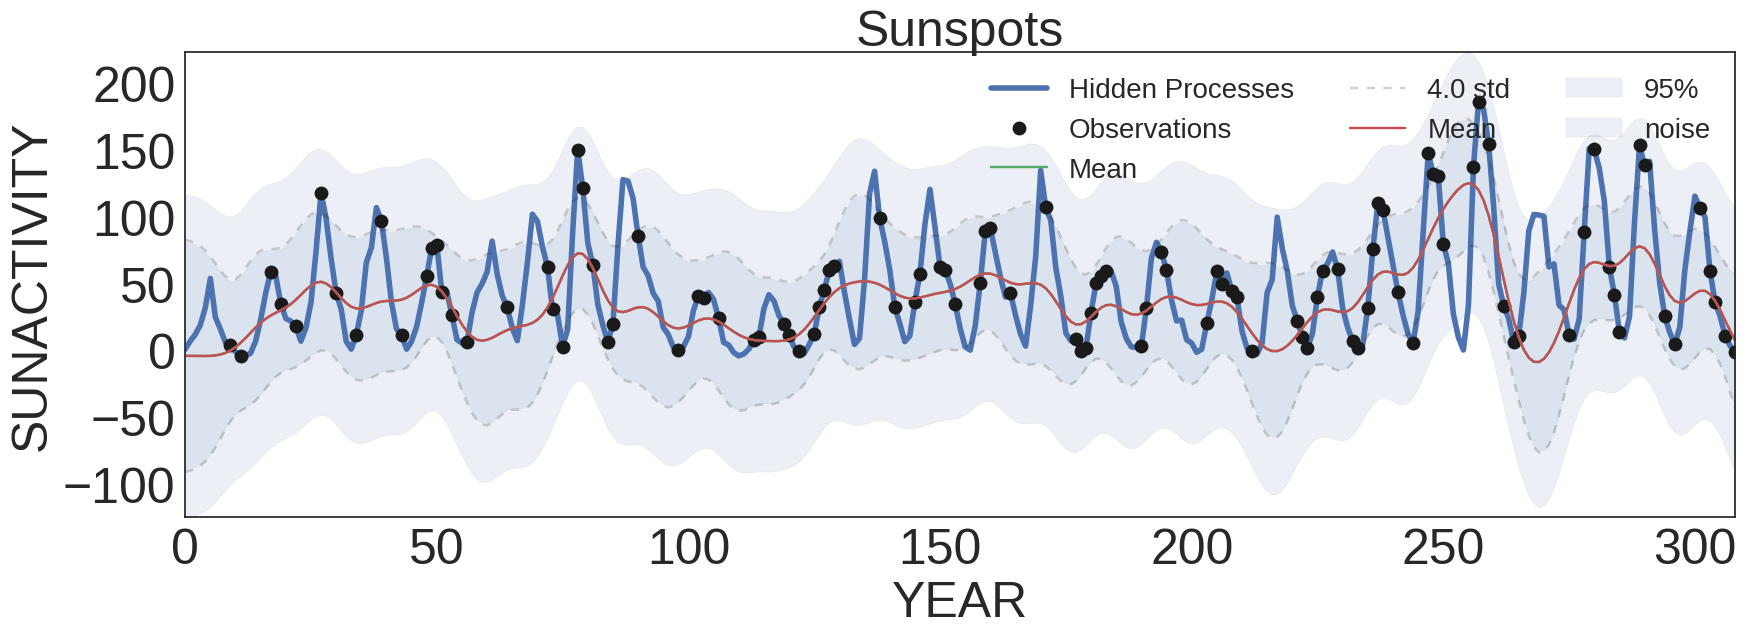

In [5]:
gp.widget_params()

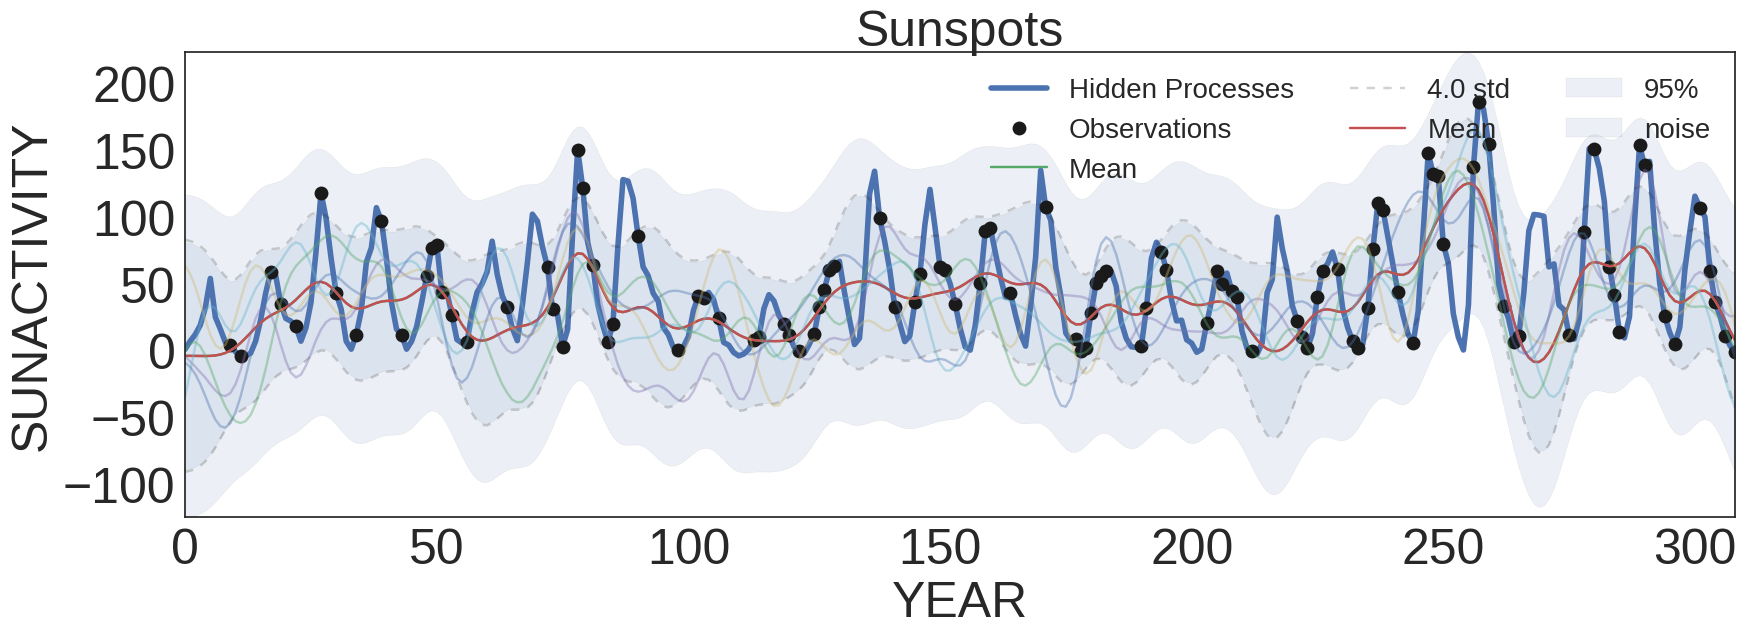

In [6]:
gp.plot(gp.get_params_widget(), samples=5)

Starting function value (-logp): 577.865


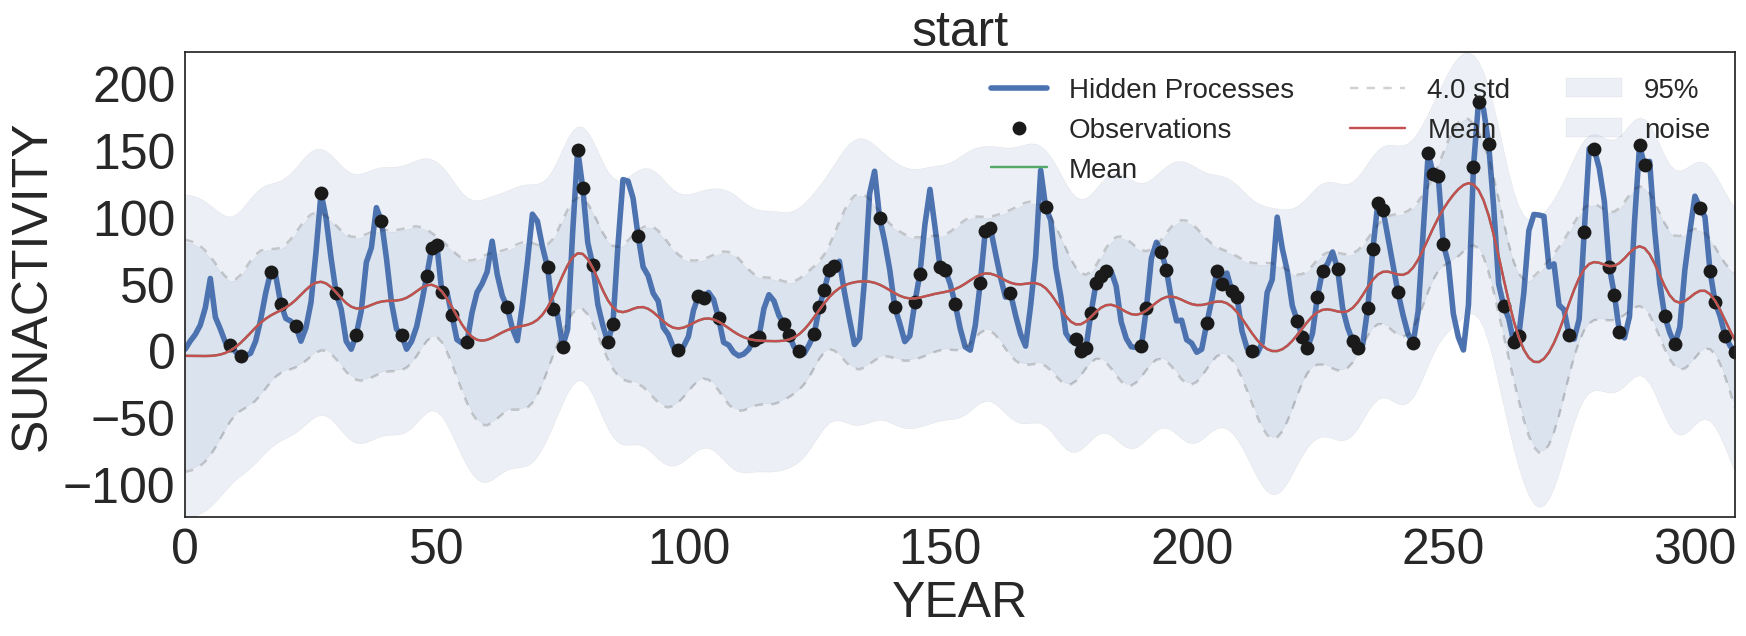


start_bfgs
         Current function value: 537.463440
         Iterations: 13
         Function evaluations: 92
         Gradient evaluations: 80


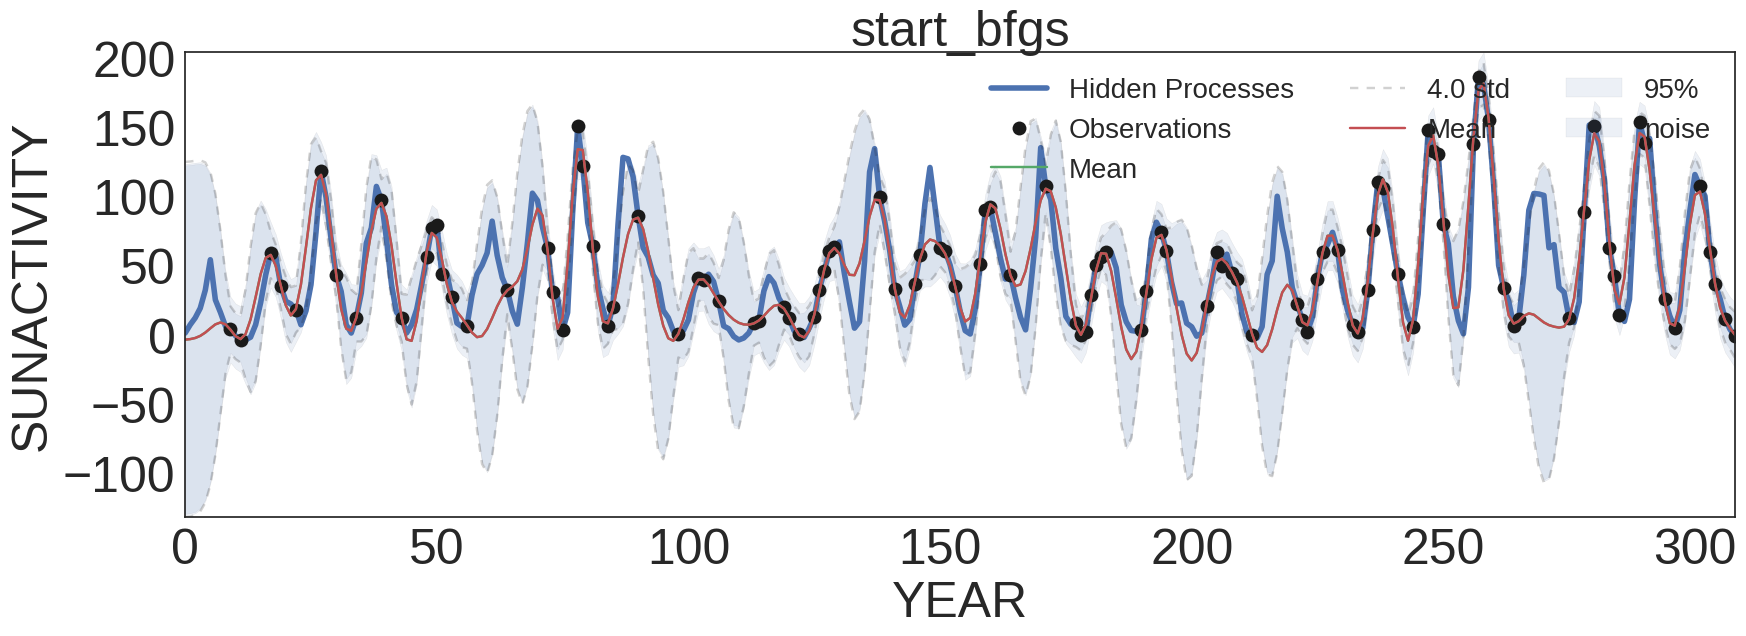


start_powell
Optimization terminated successfully.
         Current function value: 564.629639
         Iterations: 4
         Function evaluations: 176


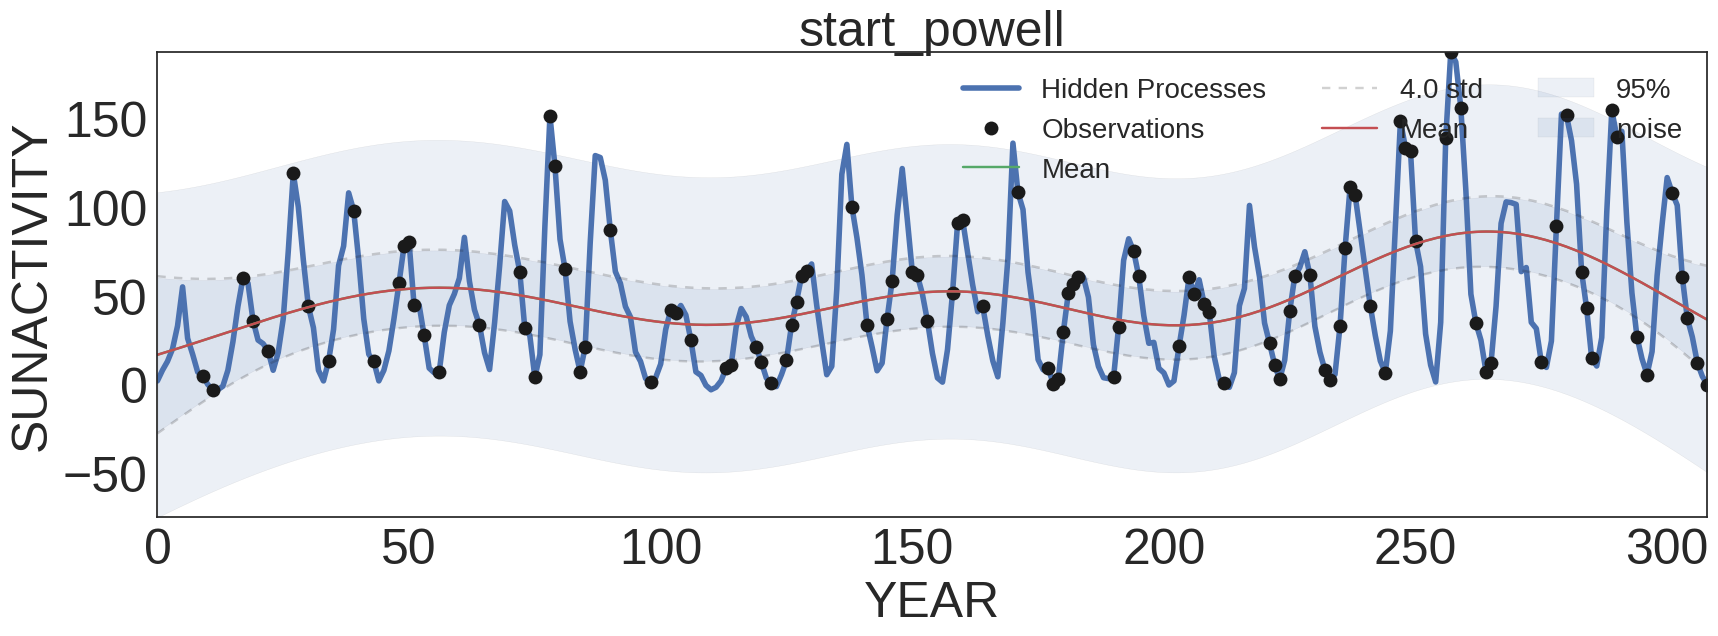


start_bfgs_bfgs
         Current function value: 537.463440
         Iterations: 0
         Function evaluations: 82
         Gradient evaluations: 70


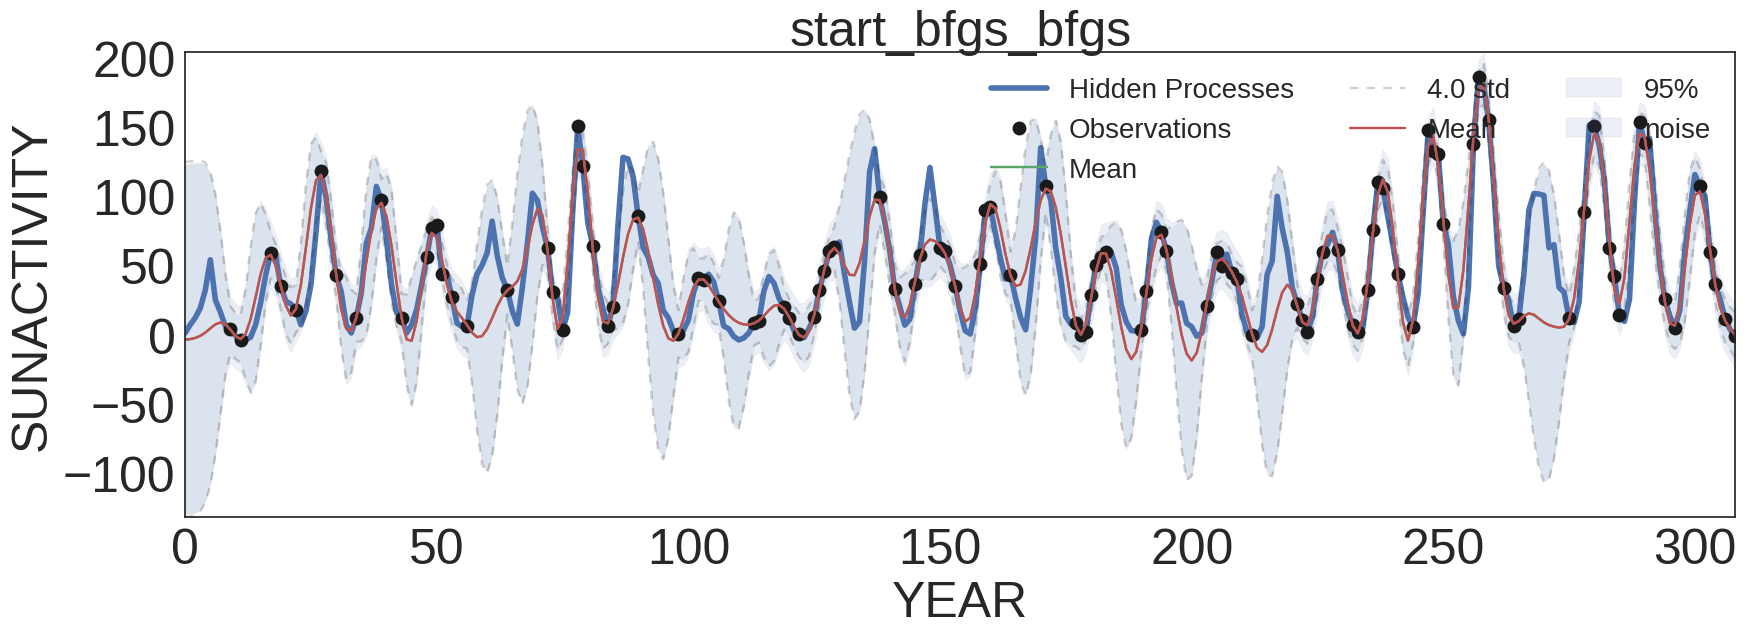


start_bfgs_powell
Optimization terminated successfully.
         Current function value: 537.463440
         Iterations: 1
         Function evaluations: 53


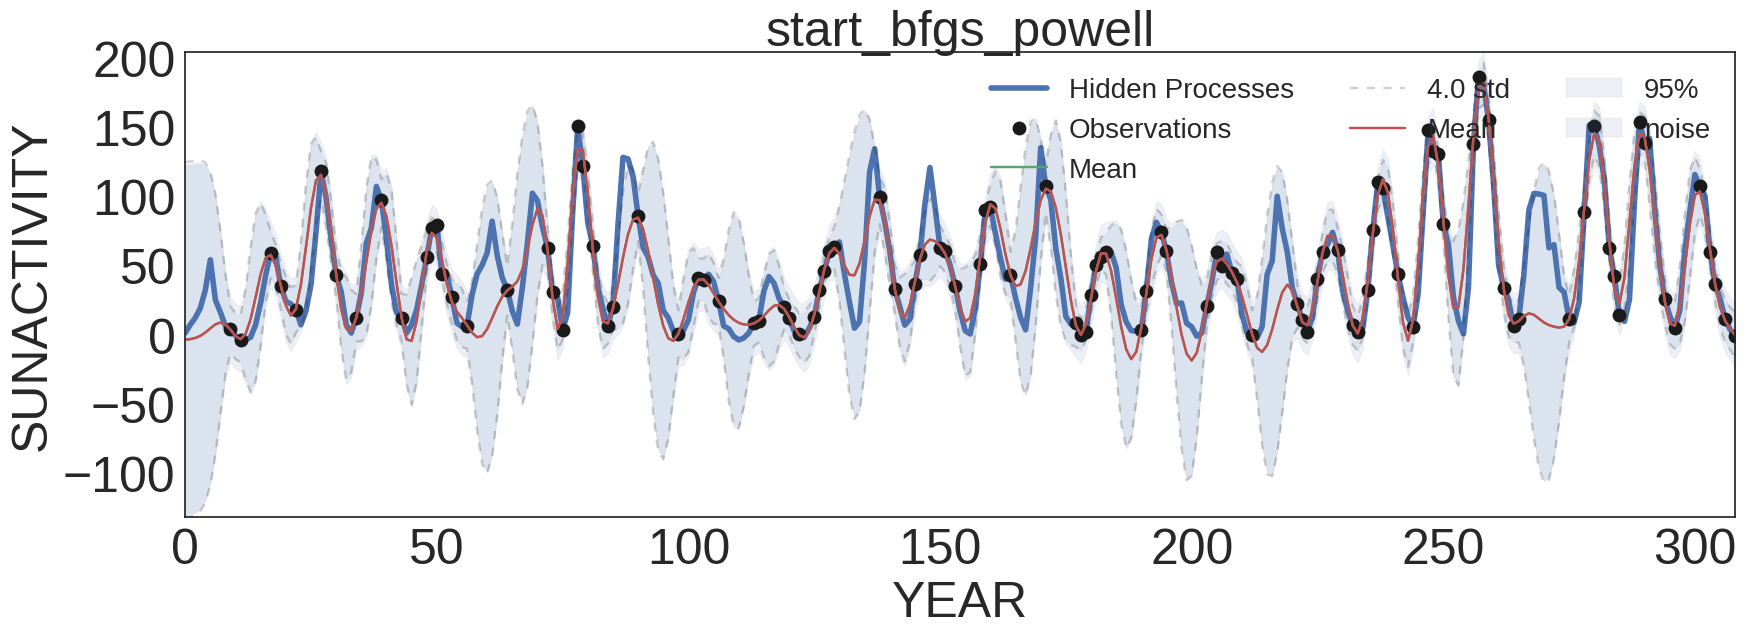


start_powell_bfgs
         Current function value: 564.629639
         Iterations: 0
         Function evaluations: 69
         Gradient evaluations: 57


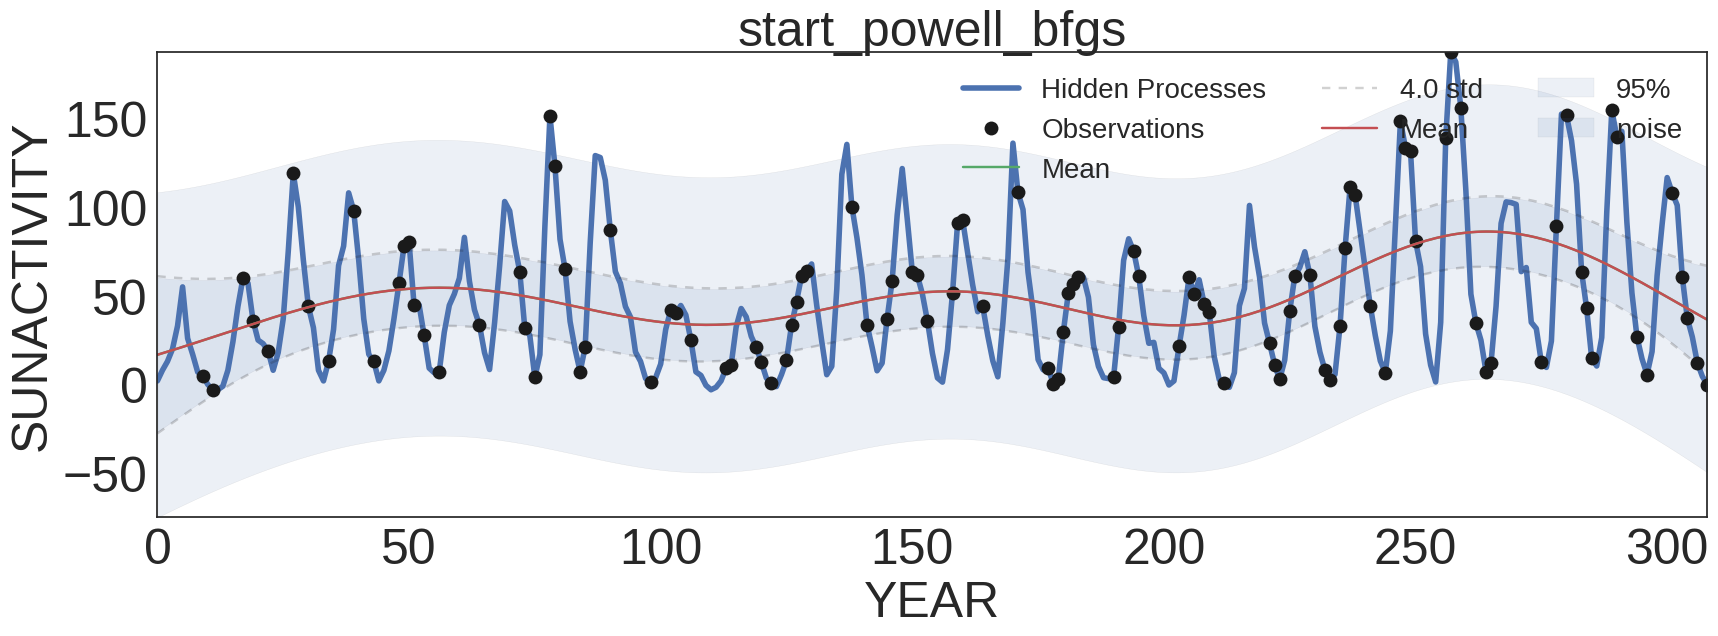

In [7]:
params = gp.find_MAP(start=gp.get_params_widget(), points=5, plot=True)

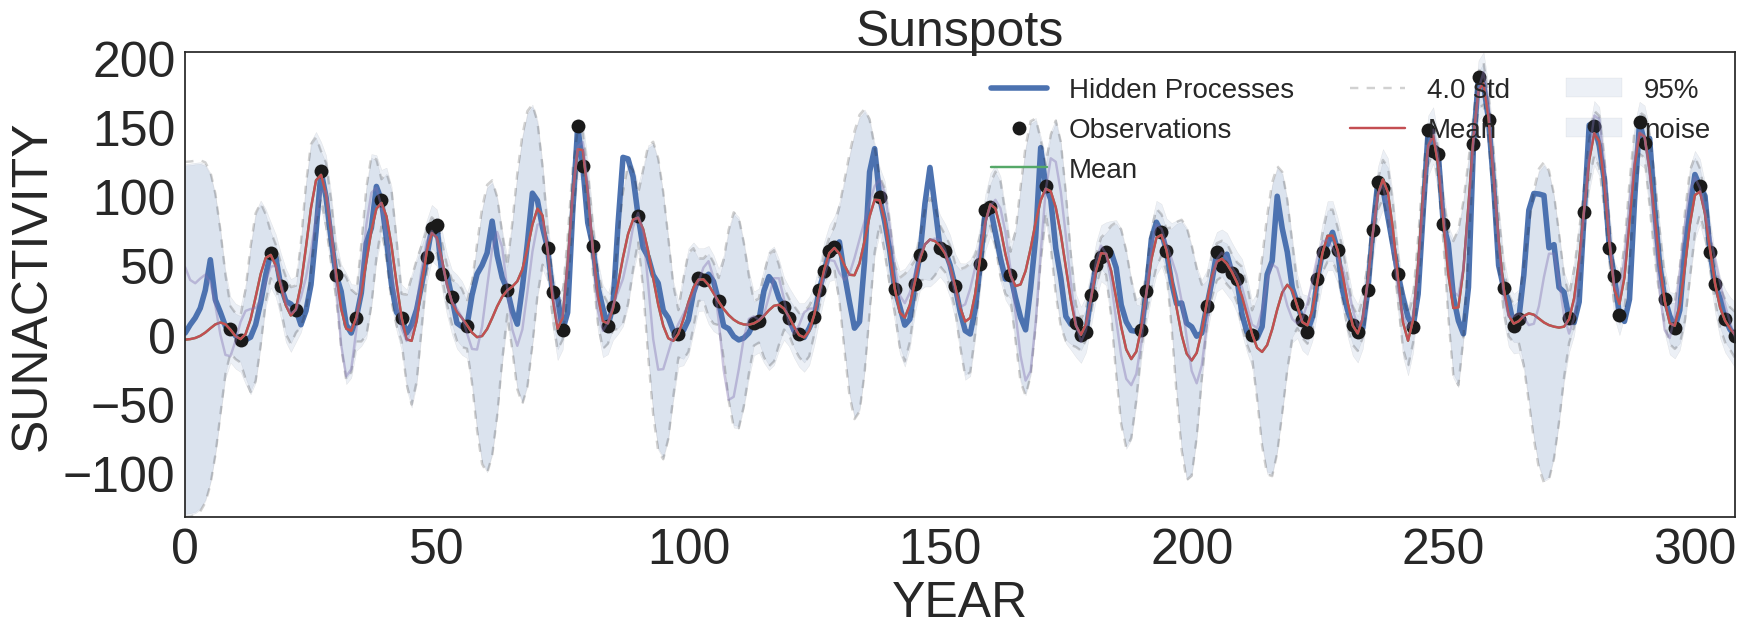

In [8]:
gp.plot(params, samples=1)
g3.save_plot('images/01-Gaussian-Processes.pdf')

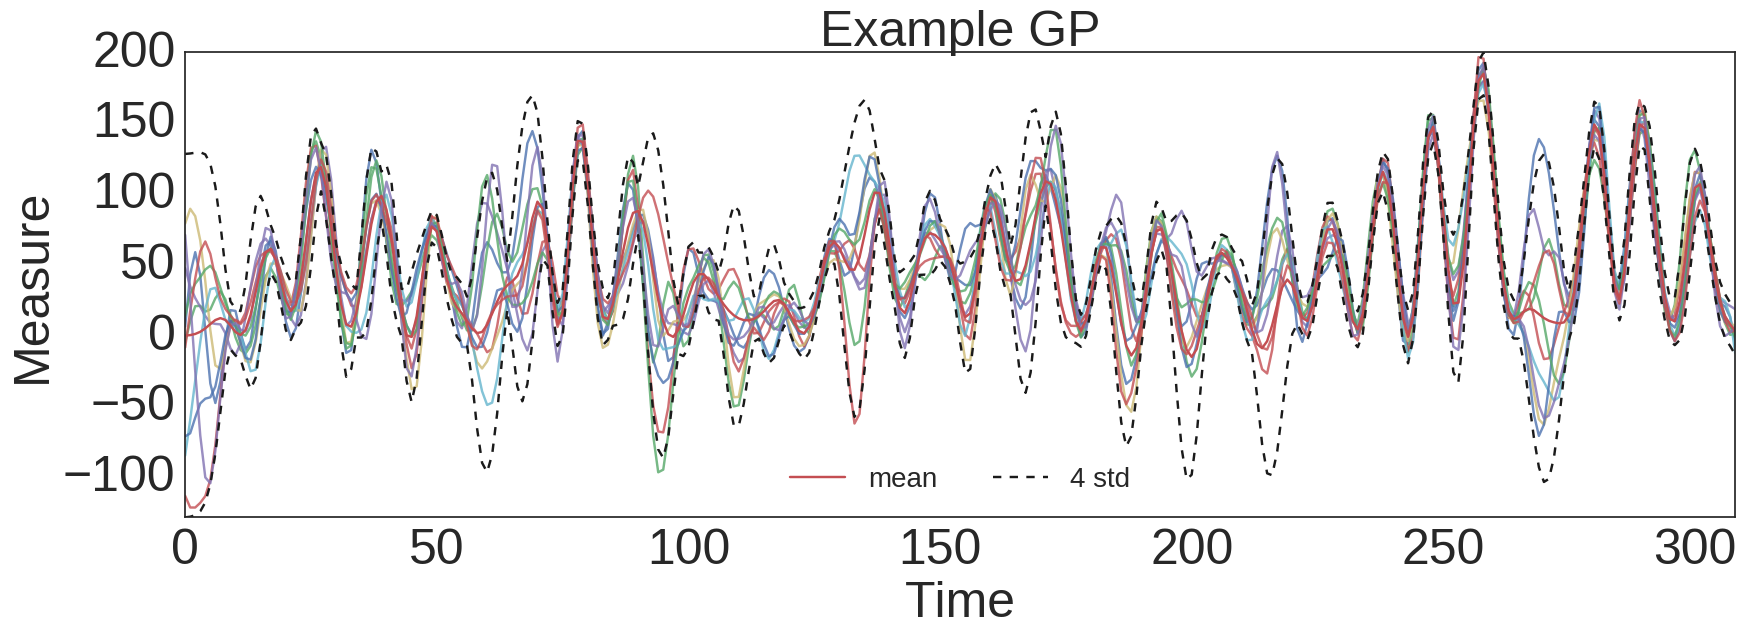

In [10]:
prediction = gp.predict(params, samples=10)
mu, std, samples = prediction.mean, prediction.std, prediction.samples
g3.plot(samples, alpha=0.8)
g3.plot(mu, 'r', label='mean')
g3.plot(mu + 2*std, '--k', label='4 std')
g3.plot(mu - 2*std, '--k')
g3.plot_text('Example GP', 'Time', 'Measure')
g3.plot_save('images/01-Gaussian-Processes-2.pdf')

Download Images
* [01-Gaussian-Processes.pdf](images/01-Gaussian-Processes.pdf)
* [01-Gaussian-Processes-2.pdf](images/01-Gaussian-Processes-2.pdf)